In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
unemployment = pd.read_csv('unemployment.csv',low_memory=False)

In [3]:
unemployment.head()

,Year,Month,State,County,Rate
0,2015,February,Mississippi,Newton County,6.1
1,2015,February,Mississippi,Panola County,9.4
2,2015,February,Mississippi,Monroe County,7.9
3,2015,February,Mississippi,Hinds County,6.1
4,2015,February,Mississippi,Kemper County,10.6


In [4]:
unemployment.tail()

,Year,Month,State,County,Rate
885543,2009,November,Maine,Somerset County,10.5
885544,2009,November,Maine,Oxford County,10.5
885545,2009,November,Maine,Knox County,7.5
885546,2009,November,Maine,Piscataquis County,11.3
885547,2009,November,Maine,Aroostook County,9.0


In [5]:
unemployment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885548 entries, 0 to 885547
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Year    885548 non-null  int64  
 1   Month   885548 non-null  object 
 2   State   885548 non-null  object 
 3   County  885548 non-null  object 
 4   Rate    885548 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 33.8+ MB


<Axes: >

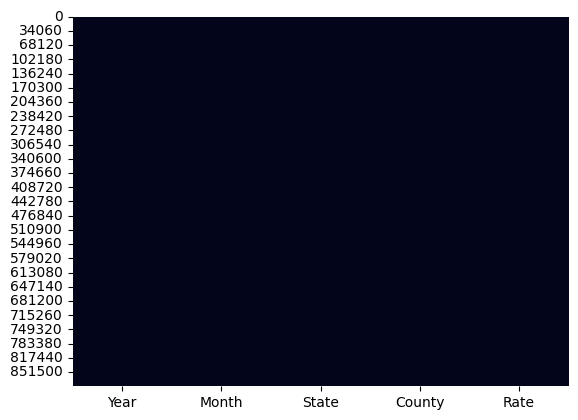

In [6]:
sns.heatmap(unemployment.isnull(),cbar=False)

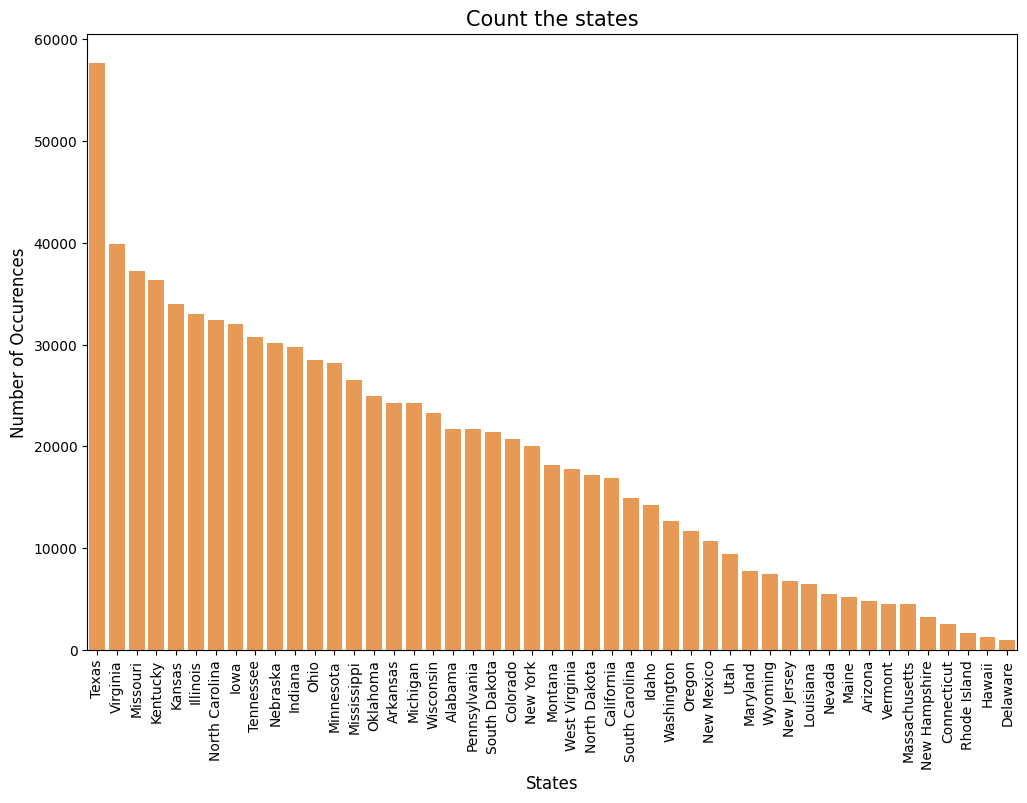

In [7]:
color = sns.color_palette()
cnt_srs = unemployment.State.value_counts()
plt.figure(figsize=(12,8))
sns.barplot( x = cnt_srs.index,y = cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurences', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title('Count the states', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

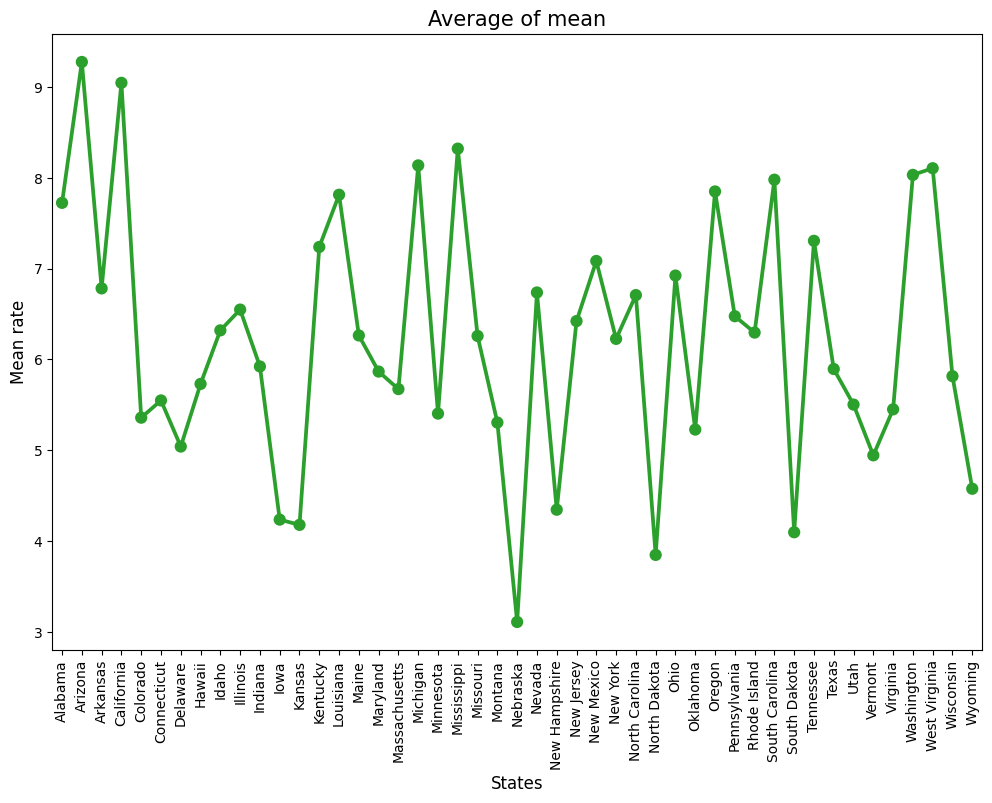

In [8]:
grouped_df = unemployment.groupby(["State"])["Rate"].aggregate("mean").reset_index()
plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['State'].values,y= grouped_df['Rate'].values, color=color[2])
plt.ylabel('Mean rate', fontsize=12)
plt.xlabel('States', fontsize=12)
plt.title("Average of mean", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
unemployment.State.nunique()

47

In [10]:
make_total = unemployment.pivot_table("Rate",index=['State'],aggfunc='mean')
topstate=make_total.sort_values(by='Rate',ascending=False)[:47]
print(topstate)

                    Rate
State                   
Arizona         9.274588
California      9.045005
Mississippi     8.320517
Michigan        8.136136
West Virginia   8.104809
Washington      8.031513
South Carolina  7.978737
Oregon          7.849271
Louisiana       7.812949
Alabama         7.723844
Tennessee       7.305776
Kentucky        7.238306
New Mexico      7.083895
Ohio            6.923390
Arkansas        6.782210
Nevada          6.737019
North Carolina  6.708099
Illinois        6.548596
Pennsylvania    6.475843
New Jersey      6.422105
Idaho           6.319992
Rhode Island    6.295802
Maine           6.263985
Missouri        6.258425
New York        6.226225
Indiana         5.922725
Texas           5.894519
Maryland        5.866422
Wisconsin       5.815659
Hawaii          5.730401
Massachusetts   5.673611
Connecticut     5.548534
Utah            5.503076
Virginia        5.450772
Minnesota       5.403750
Colorado        5.358946
Montana         5.305418
Oklahoma        5.228062


In [11]:
maketotal_1 = unemployment.pivot_table(values='Rate',index=['Month','State','County'],aggfunc=np.std)
df1 = maketotal_1.reset_index().dropna(subset=['Rate'])
df2 = df1.loc[df1.groupby('State')['Rate'].idxmax()]
for index,row in df2.iterrows():
 print(row['State'],"State which",row['County'],"has ther highest yearly fluncation.")

Alabama State which Wilcox County has ther highest yearly fluncation.
Arizona State which Yuma County has ther highest yearly fluncation.
Arkansas State which Arkansas County has ther highest yearly fluncation.
California State which Imperial County has ther highest yearly fluncation.
Colorado State which San Juan County has ther highest yearly fluncation.
Connecticut State which Windham County has ther highest yearly fluncation.
Delaware State which Sussex County has ther highest yearly fluncation.
Hawaii State which Kauai County has ther highest yearly fluncation.
Idaho State which Adams County has ther highest yearly fluncation.
Illinois State which Boone County has ther highest yearly fluncation.
Indiana State which Elkhart County has ther highest yearly fluncation.
Iowa State which Winnebago County has ther highest yearly fluncation.
Kansas State which Wilson County has ther highest yearly fluncation.
Kentucky State which Russell County has ther highest yearly fluncation.
Louisian